<a href="https://colab.research.google.com/github/ClydeMic/CAT2---AI/blob/main/Feature_Selection_%26_Regression_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries.

- Pandas : used for reading from the .csv file
- Numpy : used for mathematical computations e.g converting arr to numpy arr
- Sklearn : 
- Keras : 
- Matplotlib : used to plot and visualize  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
data = pd.read_csv('/content/Housing Pricing.csv')

In [ ]:
# size of the dataset
data.shape

(1460, 77)

In [ ]:
# get the first five rows of the dataset
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
original_features=list(data.columns)
original_features

In [ ]:
# remove the id column (starts from 1)
data.drop('Id',inplace=True,axis=1)
data.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500


In [ ]:
# checks for missing values columnwise
features_missing=list(data.columns[data.isna().any()])
len(features_missing)

15

In [ ]:
mean_fill,bfill=[],[]

In [ ]:
for feature in features_missing:
  print (feature,'',data[feature].isna().sum()/len(data)*100,' ',data[feature].dtype)
  if data[feature].dtype == 'float64':
    mean_fill.append(feature)
  else:
    bfill.append(feature)

LotFrontage  17.73972602739726   float64
MasVnrType  0.547945205479452   object
MasVnrArea  0.547945205479452   float64
BsmtQual  2.5342465753424657   object
BsmtCond  2.5342465753424657   object
BsmtExposure  2.6027397260273974   object
BsmtFinType1  2.5342465753424657   object
BsmtFinType2  2.6027397260273974   object
Electrical  0.0684931506849315   object
FireplaceQu  47.26027397260274   object
GarageType  5.5479452054794525   object
GarageYrBlt  5.5479452054794525   float64
GarageFinish  5.5479452054794525   object
GarageQual  5.5479452054794525   object
GarageCond  5.5479452054794525   object


In [ ]:
bfill

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [ ]:
for feature in mean_fill:
    data[feature].fillna(data[feature].mean(),inplace=True)

In [ ]:
for feature in bfill:
    data[feature].fillna(method='bfill',inplace=True)

In [ ]:
data['FireplaceQu'].fillna(method='ffill',inplace=True)

# **ENCODE THE DATASET** 

In [ ]:
# construct a list for categorical features
categorical_features=list(data.select_dtypes(include=['object']).columns)
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
# deduce a list of numerical features from the original features excluding categorical features
numerical_list = list(set(original_features)-set(categorical_features))
numerical_list

In [ ]:
norminal=['MSZoning','LandContour','Neighborhood']
ordinal=list(set(categorical_features)-set(norminal))
ordinal

['HeatingQC',
 'BsmtExposure',
 'BldgType',
 'GarageCond',
 'MasVnrType',
 'CentralAir',
 'ExterCond',
 'LandSlope',
 'HouseStyle',
 'BsmtFinType1',
 'Condition1',
 'Heating',
 'GarageType',
 'Condition2',
 'Electrical',
 'FireplaceQu',
 'RoofStyle',
 'SaleType',
 'Exterior2nd',
 'BsmtFinType2',
 'RoofMatl',
 'KitchenQual',
 'Street',
 'Exterior1st',
 'GarageQual',
 'GarageFinish',
 'Utilities',
 'BsmtQual',
 'Foundation',
 'ExterQual',
 'Functional',
 'SaleCondition',
 'LotShape',
 'PavedDrive',
 'BsmtCond',
 'LotConfig']

In [ ]:
target=['SalePrice']

In [ ]:
df_nominal=pd.get_dummies(data[norminal])
df_nominal.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
for feature in ordinal:
  data[feature]=data[feature].astype('category').cat.codes
df_ordinal=data[ordinal]

In [ ]:
df_ordinal

,HeatingQC,BsmtExposure,BldgType,GarageCond,MasVnrType,CentralAir,ExterCond,LandSlope,HouseStyle,BsmtFinType1,Condition1,Heating,GarageType,Condition2,Electrical,FireplaceQu,RoofStyle,SaleType,Exterior2nd,BsmtFinType2,RoofMatl,KitchenQual,Street,Exterior1st,GarageQual,GarageFinish,Utilities,BsmtQual,Foundation,ExterQual,Functional,SaleCondition,LotShape,PavedDrive,BsmtCond,LotConfig
0,0,3,0,4,1,1,4,0,5,2,2,1,1,2,4,4,1,8,13,5,1,2,1,12,4,1,0,2,2,2,6,4,3,2,3,4
1,0,1,0,4,2,1,4,0,2,0,1,1,1,2,4,4,1,8,8,5,1,3,1,8,4,1,0,2,1,3,6,4,3,2,3,2
2,0,2,0,4,1,1,4,0,5,2,2,1,1,2,4,4,1,8,13,5,1,2,1,12,4,1,0,2,2,2,6,4,0,2,3,4
3,2,3,0,4,2,1,4,0,5,0,2,1,5,2,4,2,1,8,15,5,1,2,1,13,4,2,0,3,0,3,6,0,0,2,1,0
4,0,0,0,4,1,1,4,0,5,2,2,1,1,2,4,4,1,8,13,5,1,2,1,12,4,1,0,2,2,2,6,4,0,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,3,0,4,2,1,4,0,5,5,2,1,1,2,4,4,1,8,13,5,1,3,1,12,4,1,0,2,2,3,6,4,3,2,3,4
1456,4,3,0,4,3,1,4,0,2,0,2,1,1,2,4,4,1,8,10,4,1,3,1,9,4,2,0,2,1,3,2,4,3,2,3,4
1457,0,3,0,4,2,1,2,0,5,2,2,1,1,2,4,2,1,8,5,5,1,2,1,5,4,1,0,3,4,0,6,4,3,2,1,4
1458,2,2,0,4,2,1,4,0,2,2,2,1,1,2,0,2,3,8,8,4,1,2,1,8,4,2,0,3,1,3,6,4,3,2,3,4


In [ ]:
data[numerical_list]

,GarageArea,GarageCars,KitchenAbvGr,HalfBath,OpenPorchSF,SalePrice,BsmtHalfBath,BsmtFinSF2,YrSold,BsmtFullBath,EnclosedPorch,MSSubClass,LotFrontage,MoSold,BsmtFinSF1,YearBuilt,YearRemodAdd,2ndFlrSF,TotRmsAbvGrd,BedroomAbvGr,PoolArea,GrLivArea,LotArea,ScreenPorch,GarageYrBlt,WoodDeckSF,3SsnPorch,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,Fireplaces,OverallCond,MasVnrArea,1stFlrSF,OverallQual,FullBath,MiscVal
0,548,2,1,1,61,208500,0,0,2008,1,0,60,65.0,2,706,2003,2003,854,8,3,0,1710,8450,0,2003.0,0,0,150,856,0,0,5,196.0,856,7,2,0
1,460,2,1,0,0,181500,1,0,2007,0,0,20,80.0,5,978,1976,1976,0,6,3,0,1262,9600,0,1976.0,298,0,284,1262,0,1,8,0.0,1262,6,2,0
2,608,2,1,1,42,223500,0,0,2008,1,0,60,68.0,9,486,2001,2002,866,6,3,0,1786,11250,0,2001.0,0,0,434,920,0,1,5,162.0,920,7,2,0
3,642,3,1,0,35,140000,0,0,2006,1,272,70,60.0,2,216,1915,1970,756,7,3,0,1717,9550,0,1998.0,0,0,540,756,0,1,5,0.0,961,7,1,0
4,836,3,1,1,84,250000,0,0,2008,1,0,60,84.0,12,655,2000,2000,1053,9,4,0,2198,14260,0,2000.0,192,0,490,1145,0,1,5,350.0,1145,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,2,1,1,40,175000,0,0,2007,0,0,60,62.0,8,0,1999,2000,694,7,3,0,1647,7917,0,1999.0,0,0,953,953,0,1,5,0.0,953,6,2,0
1456,500,2,1,0,0,210000,0,163,2010,1,0,20,85.0,2,790,1978,1988,0,7,3,0,2073,13175,0,1978.0,349,0,589,1542,0,2,6,119.0,2073,6,2,0
1457,252,1,1,0,60,266500,0,0,2010,0,0,70,66.0,5,275,1941,2006,1152,9,4,0,2340,9042,0,1941.0,0,0,877,1152,0,2,9,0.0,1188,7,2,2500
1458,240,1,1,0,0,142125,0,1029,2010,1,112,20,68.0,4,49,1950,1996,0,5,2,0,1078,9717,0,1950.0,366,0,0,1078,0,0,6,0.0,1078,5,1,0


In [ ]:
new_data=pd.concat([df_nominal,df_nominal,data[numerical_list]],axis=1)

In [ ]:
new_data.shape

(1460, 105)

# **Standardize**

In [ ]:
new_data.drop('SalePrice',axis=1,inplace=True)

In [ ]:
X=new_data.to_numpy()

In [ ]:
X[1]

array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 4.600e+02, 2.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 2.007e+03, 0.000e+00, 0.000e+00,
       2.000e+01, 8.000e+01, 5.000e+00, 9.780e+02, 

In [ ]:
X=StandardScaler().fit_transform(X)

In [ ]:
X

array([[-0.08304548, -0.21585871, -0.10526316, ...,  0.65147924,
         0.78974052, -0.08768781],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.07183611,
         0.78974052, -0.08768781],
       [-0.08304548, -0.21585871, -0.10526316, ...,  0.65147924,
         0.78974052, -0.08768781],
       ...,
       [-0.08304548, -0.21585871, -0.10526316, ...,  0.65147924,
         0.78974052,  4.95311151],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.79515147,
        -1.02604084, -0.08768781],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.79515147,
        -1.02604084, -0.08768781]])

In [ ]:
data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
y=data[target].to_numpy()
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [ ]:
y.shape

(1460, 1)

# **Feature Selection Using L1**

In [ ]:
lsvc = LinearSVC(C=0.02, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1460, 24)

**Spliting the dataset**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.3)

In [ ]:
X_train.shape

(1022, 24)

# **Training the Dataset using Deep Feed Forward ANN**

In [ ]:
epochs=200
model = Sequential()
model.add(Dense(24, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(Adam(learning_rate=0.01), loss="mse")

history = model.fit(X_train, y_train, validation_split=0.15,batch_size=128, epochs=epochs)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_13 (Dense)             (None, 14)                350       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 120       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 1,079
Trainable params: 1,079
Non-trainable params: 0
_________________________________________________________________


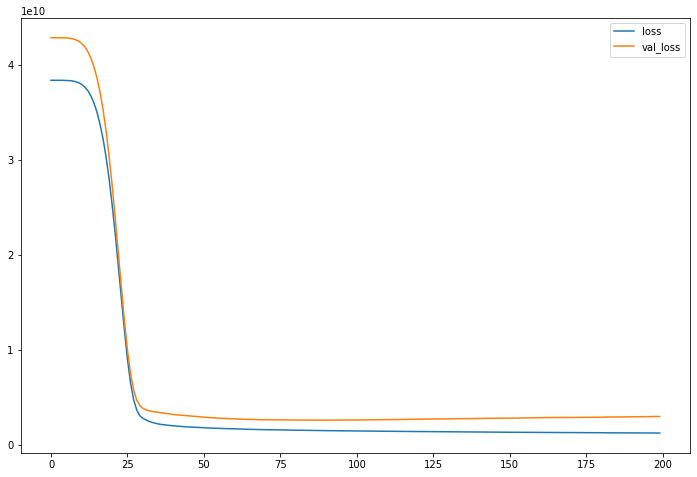

In [ ]:
historydf=pd.DataFrame(history.history, index=history.epoch)
historydf.plot(figsize=(12,8))

In [ ]:
historydf

,loss,val_loss
0,3.902357e+10,3.907406e+10
1,3.902182e+10,3.907128e+10
2,3.901700e+10,3.906369e+10
3,3.900447e+10,3.904489e+10
4,3.897525e+10,3.900232e+10
...,...,...
195,1.289509e+09,2.175078e+09
196,1.291738e+09,2.172902e+09
197,1.291671e+09,2.175533e+09
198,1.287327e+09,2.175092e+09


# **Testing the Model**

In [ ]:
y_test[10]

array([119000])

In [ ]:
y_predicted=model.predict(X_test)
print(y_predicted[10])


[118517.195]


In [ ]:
print("MSE",metrics.mean_squared_error(y_test,y_predicted))
print("MAE",metrics.mean_absolute_error(y_test,y_predicted))

MSE 2297042551.0245056
MAE 28335.963470319635


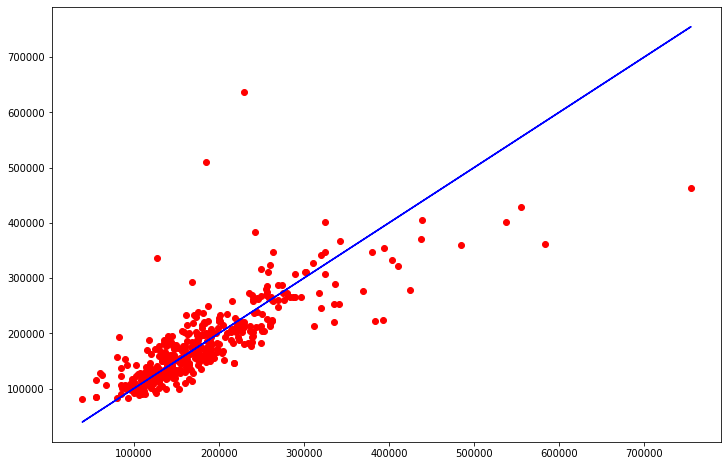

In [ ]:
fig=plt.figure(figsize=(12,8))
plt.scatter(y_test,y_predicted,c='r')
plt.plot(y_test,y_test,'b')